In [1]:
import os
import pandas as pd
import zipfile

with zipfile.ZipFile("./소상공인시장진흥공단_상가(상권)정보_20240331(수정).zip") as f:
    f.extractall("./commerical_data/")

path ="./commerical_data/"
total = []
for file in os.listdir(path):
    if file[-3:] == "csv":
        total.append(pd.read_csv(path + file , low_memory=False))
df1 = pd.concat(total)

In [ ]:
df1[(df1.상호명.str.find("치킨") > -1)][["상권업종대분류코드", "상권업종중분류코드", "표준산업분류코드"]]
#I56193 치킨 분류코드

,상권업종대분류코드,상권업종중분류코드,표준산업분류코드
157,I2,I210,I56193
221,I2,I210,I56193
358,I2,I210,I56193
631,I2,I210,I56193
851,I2,I210,I56193
...,...,...,...
71115,I2,I210,I56193
71398,I2,I210,I56111
71405,I2,I210,I56193
71514,I2,I210,I56193


In [ ]:
df1[(df1.상호명.str.find("커피") > -1)][["상권업종대분류코드", "상권업종중분류코드", "표준산업분류코드"]]
#I56221 카페 분류코드

,상권업종대분류코드,상권업종중분류코드,표준산업분류코드
167,I2,I212,I56221
175,I2,I212,I56221
202,I2,I212,I56221
503,I2,I212,I56221
572,I2,I212,I56221
...,...,...,...
71605,I2,I212,I56221
71616,I2,I212,I56221
71654,I2,I212,I56221
71686,I2,I212,I56221


In [ ]:
df1[ (df1['표준산업분류코드'] == 'I56193') ].groupby('시도명')[["상호명"]].count()

,상호명
시도명,
강원특별자치도,1588
경기도,8778
경상남도,2992
경상북도,2475
광주광역시,1106
대구광역시,1844
대전광역시,1167
부산광역시,2610
서울특별시,5136


In [6]:
치킨 = df1[(df1.상권업종소분류명 == '치킨') & (df1.시도명 == '서울특별시')].copy()
카페 = df1[(df1.상권업종소분류명 == '카페') & (df1.시도명 == '서울특별시')].copy()

치킨_집계 = 치킨.groupby(['시군구명'])[['상호명']].count()
카페_집계 = 카페.groupby(['시군구명'])[['상호명']].count()

In [11]:
집계 = pd.merge(치킨_집계, 카페_집계, left_index=True,right_index=True, how='inner')
집계.columns  = ['치킨 매장 수', '커피 매장 수']
집계

,치킨 매장 수,커피 매장 수
시군구명,,
강남구,312,2076
강동구,232,726
강북구,191,485
강서구,312,1005
관악구,285,792
광진구,222,779
구로구,236,589
금천구,146,541
노원구,276,641


In [13]:
path ="./commerical_data2/"
with zipfile.ZipFile("./소상공인시장진흥공단_상가(상권)정보_20240630.zip") as f:
    f.extractall(path)
    
total = []
for file in os.listdir(path):
    if (file[-3:] == "csv") and ('서울' in file):
        total.append(pd.read_csv(path + file , low_memory=False))

df2 = pd.concat(total)
df2.shape

(460437, 39)

In [ ]:
df2['상권업종대분류명'].unique()
#분류 확인

array(['음식', '숙박', '교육', '과학·기술', '소매', '시설관리·임대', '수리·개인', '부동산',
       '예술·스포츠', '보건의료'], dtype=object)

In [21]:

df1 = df1[(df1['시도명'] == '서울특별시')].copy()
df1_food = df1[df1['상권업종대분류명'] == '음식']
df2_food = df2[df2['상권업종대분류명'] == '음식']

df1_food = df1_food.groupby("상권업종소분류명")["상권업종소분류명"].count()
df2_food = df2_food.groupby("상권업종소분류명")["상권업종소분류명"].count()

In [22]:
폐업률 = pd.merge(df1_food, df2_food, left_index=True,right_index=True, how='inner')
폐업률.columns = ['1 매장수', '2 매장수']
폐업률['폐업률'] = (1 - (폐업률['2 매장수'] /폐업률['1 매장수'])) * 100 
폐업률

,1 매장수,2 매장수,폐업률
상권업종소분류명,,,
경양식,5775,5275,8.658009
곱창 전골/구이,1299,1202,7.467283
구내식당,927,900,2.912621
국/탕/찌개류,4555,4261,6.454446
국수/칼국수,2826,2681,5.130927
그 외 기타 간이 음식점,1528,1401,8.311518
기타 동남아식 전문,127,112,11.811024
기타 서양식 음식점,297,262,11.784512
기타 일식 음식점,90,81,10.000000


In [26]:
df1_mara = df1[df1.상호명.str.find('마라') > -1 ]
df2_mara = df2[df2.상호명.str.find('마라') > -1 ]
mara_v = 100-(df2_mara.shape[0]/df1_mara.shape[0])*100
#마라탕의 폐업률 계산

/home/user1/miniconda3/envs/pandas/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user1/miniconda3/envs/pandas/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user1/miniconda3/envs/pandas/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54224 (\N{HANGUL SYLLABLE PYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user1/miniconda3/envs/pandas/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user1/miniconda3/envs/pandas/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: 

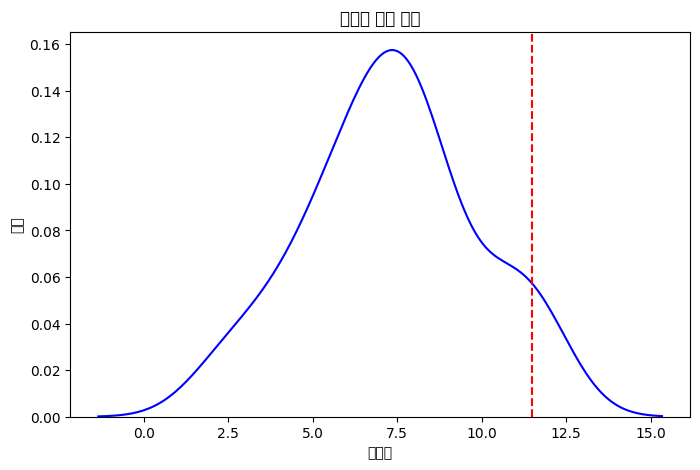

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(폐업률['폐업률'], color='blue', fill=False)
plt.axvline(x=mara_v, color='red', linestyle='--')  # x=mara_v 위치에 빨간 점선 추가
plt.title('폐업률 분포 곡선')
plt.xlabel('폐업률')
plt.ylabel('밀도')
plt.show()